# Задание
Датасет про [диабет](/data/diabetes.csv)

- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и масштабирование.
- Получите и визуализируйте (графически) статистику по набору данных (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили), постройте 3D-визуализацию признаков.
- Реализуйте метод k-ближайших соседей без использования сторонних библиотек, кроме NumPy и Pandas.
- Постройте 2 модели k-NN с различными наборами признаков:
  - Модель 1: Признаки случайно отбираются.
  - Модель 2: Фиксированный набор признаков, который выбирается заранее.
- Для каждой модели проведите оценку на тестовом наборе данных при разных значения k. Выберите несколько различных значений k, например, `k = 3`, `k = 5`, `k = 10`, и т.д. Постройте матрицу ошибок.
# Решение
Импортируем необходимые библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Предварительная обработка данных
## 1.1. Загрузка данных

In [5]:
file_path = './data/diabetes.csv'
data = pd.read_csv(file_path)

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1.2. Обработка отсутствующих значений
Проверим наличие пропущенных значений в датасете и удалим строки с пропущенными значениями.

In [6]:
missing_values = data.isnull().sum()
print("Отсутствующие значения в каждой колонне:")
print(missing_values)
rows_to_delete = data.isnull().any(axis=1).sum()
data = data.dropna()
print("Удаленные строки:", rows_to_delete)

Отсутствующие значения в каждой колонне:
Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64
Удаленные строки: 0


Удаляем строки с нулевыми значениями для столбцов Glucose, BloodPressure, SkinThickness, BMI:

In [7]:
labels_to_remove = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
zero_values = (data[labels_to_remove] == 0).sum()
print("Нулевые значения в каждой колонне:")
print(zero_values)
rows_to_delete = (data[labels_to_remove] == 0).any(axis=1).sum()
data = data[(data[labels_to_remove] != 0).all(axis=1)]
print("Удаленные строки:", rows_to_delete)
data.describe()

Нулевые значения в каждой колонне:
Glucose            5
BloodPressure     35
SkinThickness    227
BMI               11
dtype: int64
Удаленные строки: 236


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,3.516917,121.030075,71.505639,29.182331,114.988722,32.890226,0.502966,31.614662,0.332707
std,3.312036,30.999226,12.310253,10.523878,123.007555,6.881109,0.344546,10.761584,0.471626
min,0.000000,56.000000,24.000000,7.000000,0.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,98.750000,64.000000,22.000000,0.000000,27.875000,0.258750,23.000000,0.000000
50%,2.000000,115.000000,72.000000,29.000000,91.500000,32.800000,0.416000,28.000000,0.000000
75%,5.000000,141.250000,80.000000,36.000000,165.250000,36.900000,0.658500,38.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 1.3. Нормализация данных

In [8]:
data = (data - data.min()) / (data.max() - data.min())
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.206877,0.454756,0.552391,0.241112,0.135920,0.300414,0.179000,0.176911,0.332707
std,0.194826,0.216778,0.143142,0.114390,0.145399,0.140718,0.147557,0.179360,0.471626
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.298951,0.465116,0.163043,0.000000,0.197853,0.074411,0.033333,0.000000
50%,0.117647,0.412587,0.558140,0.239130,0.108156,0.298569,0.141756,0.116667,0.000000
75%,0.294118,0.596154,0.651163,0.315217,0.195331,0.382413,0.245610,0.283333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 1.4. Разделение данных на обучающую и тестовую выборки

In [10]:
def train_test_divide(x, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.permutation(len(x))
    test_size = int(len(x) * test_size)
    
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    return x.iloc[train_indices], x.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]

x = data.drop('Outcome', axis=1)
y = data['Outcome']

x_train, x_test, y_train, y_test = train_test_divide(x, y, test_size=0.2, random_state=42)

# 2. Визуализация данных
## 2.1. Визуализация статистики по датасету

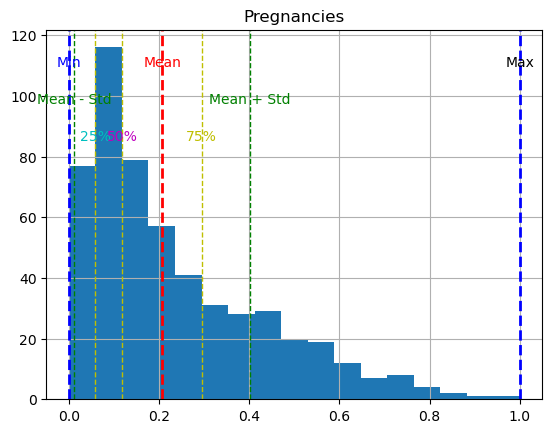

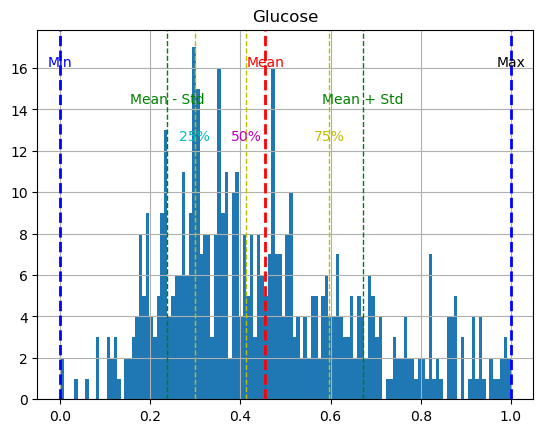

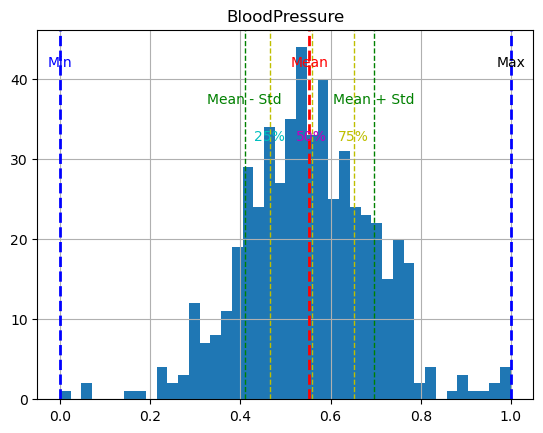

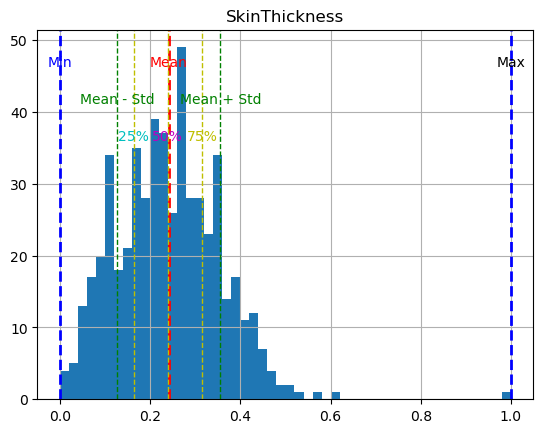

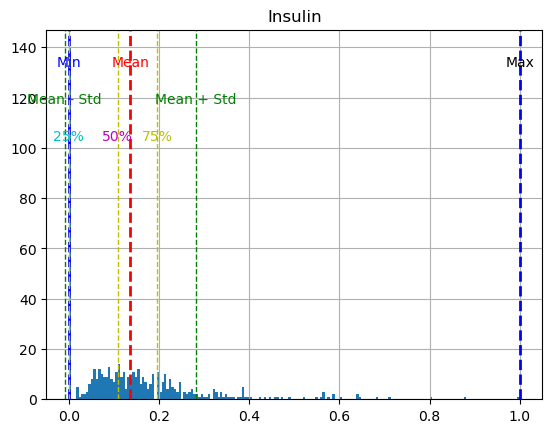

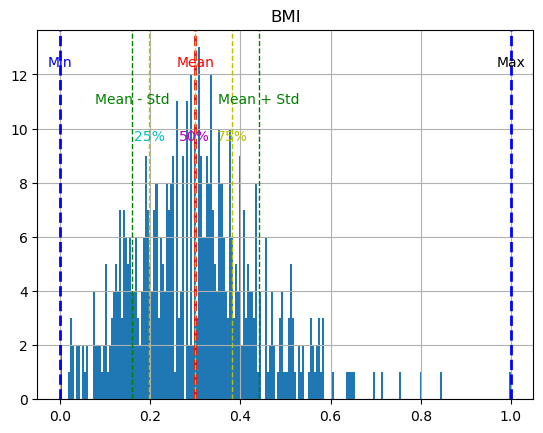

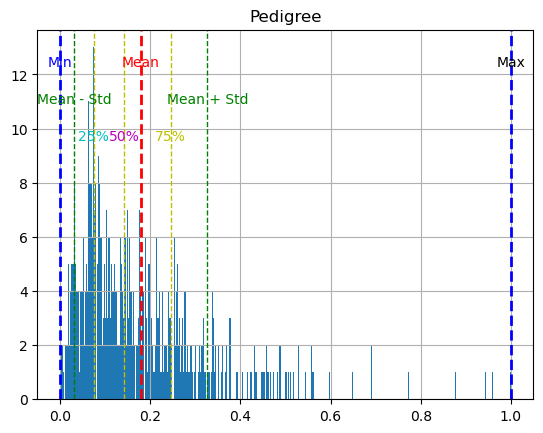

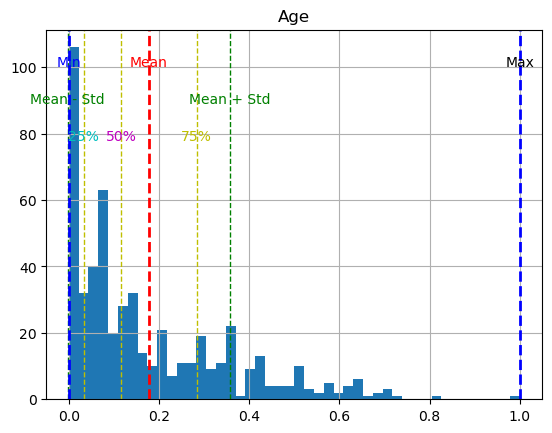

In [12]:
desc = data.describe()

for col in data.columns:
    if col == 'Outcome':
        continue
    plt.figure()
    data[col].hist(bins=len(data[col].unique()))
    
    mean = desc[col]['mean']
    sigma = desc[col]['std']
    min = desc[col]['min']
    quart_25 = desc[col]['25%']
    median = desc[col]['50%']
    quart_75 = desc[col]['75%']
    max = desc[col]['max']
    
    plt.axvline(mean, color='r', linestyle='--', linewidth=2)
    plt.text(mean, plt.ylim()[1]*0.9, 'Mean', color='r', ha='center')
    
    plt.axvline(mean + sigma, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean + sigma, plt.ylim()[1]*0.8, 'Mean + σ', color='g', ha='center')
    
    plt.axvline(mean - sigma, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean - sigma, plt.ylim()[1]*0.8, 'Mean - σ', color='g', ha='center')
    
    plt.axvline(min, color='b', linestyle='dashed', linewidth=2)
    plt.text(min, plt.ylim()[1]*0.9, 'Min', color='b', ha='center')
    
    plt.axvline(quart_25, color='y', linestyle='dashed', linewidth=1)
    plt.text(quart_25, plt.ylim()[1]*0.7, '25%', color='c', ha='center')
    
    plt.axvline(median, color='y', linestyle='dashed', linewidth=1)
    plt.text(median, plt.ylim()[1]*0.7, '50%', color='m', ha='center')
    
    plt.axvline(quart_75, color='y', linestyle='dashed', linewidth=1)
    plt.text(quart_75, plt.ylim()[1]*0.7, '75%', color='y', ha='center')
    
    plt.axvline(max, color='b', linestyle='dashed', linewidth=2)
    plt.text(max, plt.ylim()[1]*0.9, 'Max', color='k', ha='center')
    
    plt.title(col)
    plt.show()

## 2.2. Корреляционная матрица
Именно в этом случае используется коэффициент корреляции Пирсона, формула которого:\
![Pearson](./formula.png)

Матрица корреляции:
                Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459       0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000       0.152590       0.057328  0.331357   
BloodPressure     0.141282  0.152590       1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328       0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357       0.088933       0.436783  1.000000   
BMI               0.017683  0.221071       0.281805       0.392573  0.197859   
Pedigree         -0.033523  0.137337       0.041265       0.183928  0.185071   
Age               0.544341  0.263514       0.239528      -0.113970 -0.042163   
Outcome           0.221898  0.466581       0.065068       0.074752  0.130548   

                    BMI  Pedigree       Age   Outcome  
Pregnancies    0.017683 -0.033523  0.544341  0.221898  
Glucose        0.221071  0.137337  0.263514  0.466581  
BloodPress

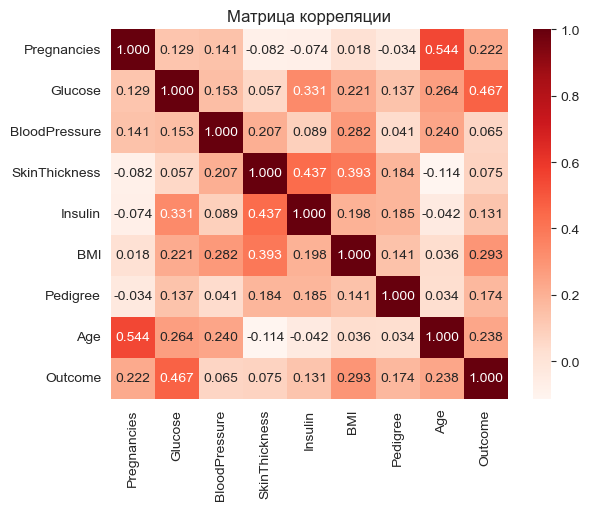

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
print("Матрица корреляции:\n", correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='Reds')
plt.title('Матрица корреляции')
plt.show()

## 2.3. 3D-визуализация признаков
### 1. 3 случайных признака


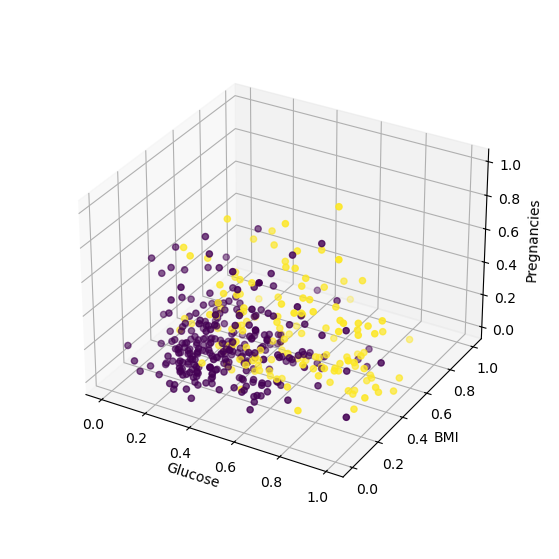

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

random_columns = x_train.sample(3, axis=1, random_state=42)
x = random_columns.iloc[:, 0]
y = random_columns.iloc[:, 1]
z = random_columns.iloc[:, 2]

ax.scatter(x, y, z, c=y_train, cmap='viridis')
ax.set_xlabel(random_columns.columns[0])
ax.set_ylabel(random_columns.columns[1])
ax.set_zlabel(random_columns.columns[2])
ax.set_box_aspect(None, zoom=0.85)
plt.show()

### 2. Выбранные признаки

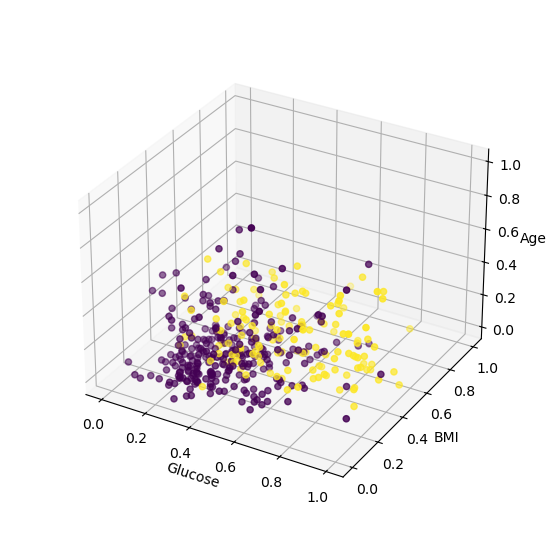

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = x_train['Glucose']
y = x_train['BMI']
z = x_train['Age']

ax.scatter(x, y, z, c=y_train, cmap='viridis')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_box_aspect(None, zoom=0.85)
plt.show()

# 3. Метод k-ближайших соседей

In [16]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))
def k_nearest_neighbors(train_data, train_labels, test_point, k=3):
    train_data = np.array(train_data)
    train_labels = np.array(train_labels)
    
    distances = []
    for i in range(len(train_data)):
        distance = euclidean_distance(train_data[i], test_point)
        distances.append((distance, train_labels[i]))
    # Ближайшие k соседей в виде индексов*
    nearest_indices = np.argpartition([distance for distance, _ in distances], k)[:k]
    # Метки ближайших k соседей (в данном случае Outcome)
    nearest_labels = [int(train_labels[i]) for i in nearest_indices]
    # Определение самого часто встречаемого класса среди классов ближайших соседей
    most_common = np.bincount(nearest_labels).argmax()
    return most_common

# 4. Построение моделей k-NN
## 4.1. Модель 1: Признаки случайно отбираются

In [17]:

from sklearn.metrics import accuracy_score

random_features = x_train.sample(n=3, axis=1, random_state=10)
x_test_random = x_test[random_features.columns]

print("Случайные признаки:", random_features.columns)
for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(random_features.values, y_train.values, test_point, k=k) for test_point in x_test_random.values]
    # Инициализация матрицы 2 на 2, которая и будет нашей матрицей ошибок
    confusion = np.zeros((2, 2), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual), int(predicted)] += 1
    print(f"Матрица ошибок для k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))

Случайные признаки: Index(['BloodPressure', 'SkinThickness', 'Pedigree'], dtype='object')
Матрица ошибок для k=3:
[[50 23]
 [17 16]]
0.6226415094339622
Матрица ошибок для k=5:
[[58 15]
 [16 17]]
0.7075471698113207
Матрица ошибок для k=10:
[[63 10]
 [23 10]]
0.6886792452830188


## 4.2. Модель 2: Фиксированный набор признаков

In [18]:
from sklearn.metrics import accuracy_score

fixed_features, x_test_fixed = x_train[['Glucose', 'BMI', 'Age']], x_test[['Glucose', 'BMI', 'Age']]

print("Фиксированные признаки:", fixed_features.columns)
for k in [3, 5, 10]:
    y_pred = [k_nearest_neighbors(fixed_features.values, y_train.values, test_point, k=k) for test_point in x_test_fixed.values]
    
    confusion = np.zeros((2, 2), dtype=int)
    for actual, predicted in zip(y_test, y_pred):
        confusion[int(actual), int(predicted)] += 1
    print(f"Матрица ошибок для k={k}:")
    print(confusion)
    print(accuracy_score(y_test, y_pred))

Фиксированные признаки: Index(['Glucose', 'BMI', 'Age'], dtype='object')
Матрица ошибок для k=3:
[[58 15]
 [12 21]]
0.7452830188679245
Матрица ошибок для k=5:
[[60 13]
 [12 21]]
0.7641509433962265
Матрица ошибок для k=10:
[[66  7]
 [14 19]]
0.8018867924528302
